In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as math
import scipy.stats as stats
import statsmodels.api as sm

#import data from the Fantasy Football Repo
yearlyStats = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2019.csv')
print(yearlyStats.head())

   Unnamed: 0               Player   Tm Pos   Age     G    GS    Tgt    Rec  \
0           0  Christian McCaffrey  CAR  RB  23.0  16.0  16.0  142.0  116.0   
1           1        Lamar Jackson  BAL  QB  22.0  15.0  15.0    0.0    0.0   
2           2        Derrick Henry  TEN  RB  25.0  15.0  15.0   24.0   18.0   
3           3          Aaron Jones  GNB  RB  25.0  16.0  16.0   68.0   49.0   
4           4      Ezekiel Elliott  DAL  RB  24.0  16.0  16.0   71.0   54.0   

   PassingYds  ...  PassingAtt  RushingYds  RushingTD  RushingAtt  \
0         0.0  ...         2.0      1387.0       15.0       287.0   
1      3127.0  ...       401.0      1206.0        7.0       176.0   
2         0.0  ...         0.0      1540.0       16.0       303.0   
3         0.0  ...         0.0      1084.0       16.0       236.0   
4         0.0  ...         0.0      1357.0       12.0       301.0   

   ReceivingYds  ReceivingTD  FantasyPoints  Int  Fumbles  FumblesLost  
0        1005.0          4.0         

Text(0, 0.5, 'Annual Fantasy Points')

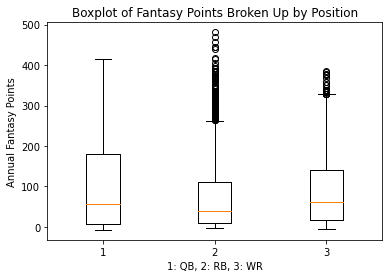

In [2]:
yearlydf = pd.DataFrame()
for x in range(1999,2020):
    #import data from the Fantasy Football Repo
    tempdf = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/{}.csv'.format(str(x)))
    tempdf['Year'] = x
    yearlydf = pd.concat([yearlydf,tempdf])

yearlydf.drop(['Unnamed: 0','Tgt','Rec','PassingTD','PassingAtt','RushingTD','RushingAtt','ReceivingTD','Int','Fumbles','FumblesLost'],axis=1,inplace=True)

QB_yearlydf = yearlydf.loc[yearlydf['Pos'] == 'QB']#separating data into dataframes based on positons, this is QB 
RB_yearlydf = yearlydf.loc[yearlydf['Pos'] == 'RB']#separating data into dataframes based on positons, this is RB 
WR_yearlydf = yearlydf.loc[yearlydf['Pos'] == 'WR']#separating data into dataframes based on positons, this is WR 
plt.boxplot([QB_yearlydf['FantasyPoints'],RB_yearlydf['FantasyPoints'], WR_yearlydf['FantasyPoints']])
plt.title('Boxplot of Fantasy Points Broken Up by Position')
plt.xlabel('1: QB, 2: RB, 3: WR')
plt.ylabel('Annual Fantasy Points')

Text(0, 0.5, 'Annual Yards')

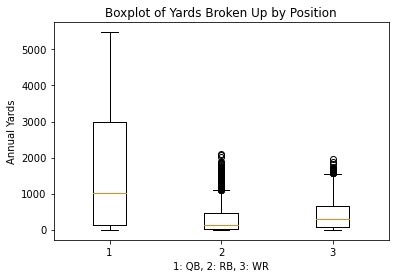

In [3]:
plt.boxplot([QB_yearlydf['PassingYds'],RB_yearlydf['RushingYds'], WR_yearlydf['ReceivingYds']])
plt.title('Boxplot of Yards Broken Up by Position')
plt.xlabel('1: QB, 2: RB, 3: WR')
plt.ylabel('Annual Yards')

Text(0, 0.5, 'Number of Players in Each Bucket')

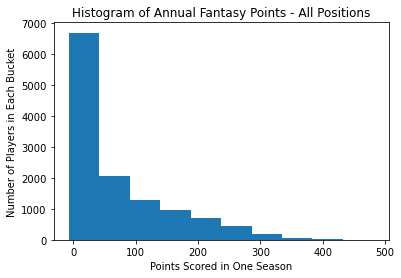

In [4]:
plt.hist(yearlydf['FantasyPoints'])
plt.title('Histogram of Annual Fantasy Points - All Positions')
plt.xlabel('Points Scored in One Season')
plt.ylabel('Number of Players in Each Bucket')

In [5]:
yearlydf.size

137082

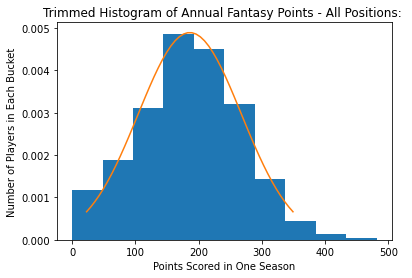

In [6]:
yearlydf_trim = yearlydf.loc[yearlydf['GS'] > 11] #removing data that heavily skews our overall data. 
plt.hist(yearlydf_trim['FantasyPoints'],density=True)
plt.title('Trimmed Histogram of Annual Fantasy Points - All Positions: ')
plt.xlabel('Points Scored in One Season')
plt.ylabel('Number of Players in Each Bucket')

points = yearlydf_trim['FantasyPoints']
mean = points.mean()
stdev = math.sqrt(points.var())
normalDist = np.linspace(mean - (2*stdev), mean + 2*stdev)
normCurve = stats.norm.pdf(normalDist,mean,stdev)
ax = plt.plot(normalDist, normCurve)

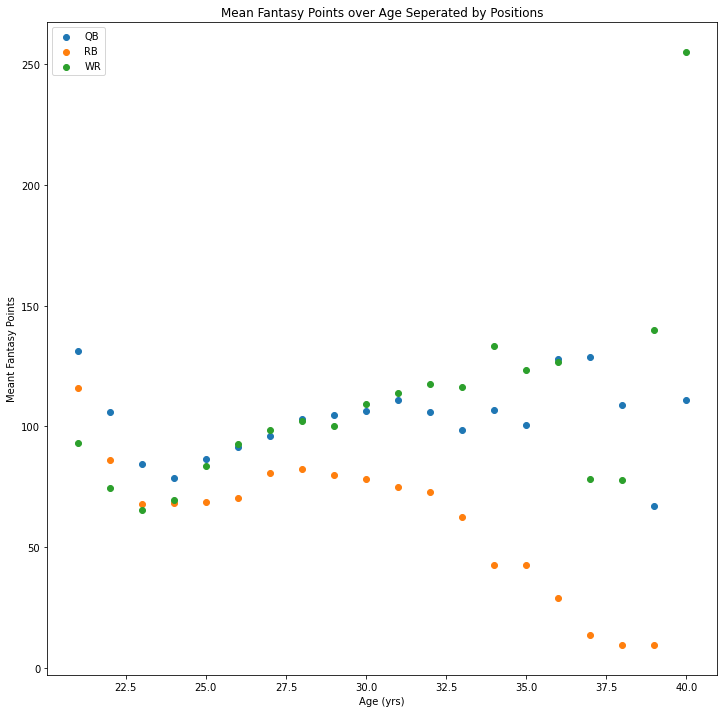

In [7]:
yearlydf.head()
agedf = [pd.DataFrame() for x in range(20)]
QB_means = []
RB_means = []
WR_means = []
for x in range(20):
    QB_means.append(QB_yearlydf.loc[QB_yearlydf['Age'] == x + 21]['FantasyPoints'].mean())
    RB_means.append(RB_yearlydf.loc[RB_yearlydf['Age'] == x + 21]['FantasyPoints'].mean())
    WR_means.append(WR_yearlydf.loc[WR_yearlydf['Age'] == x + 21]['FantasyPoints'].mean())
    
x = np.linspace(21,40,20)

fig, axs = plt.subplots(1,figsize=[12,12])
axs = plt.scatter(x,QB_means,label='QB')
axs = plt.scatter(x,RB_means,label='RB')
axs = plt.scatter(x,WR_means,label = 'WR')
plt.title('Mean Fantasy Points over Age Seperated by Positions')
plt.xlabel('Age (yrs)')
plt.ylabel('Meant Fantasy Points')
plt.legend()



nan


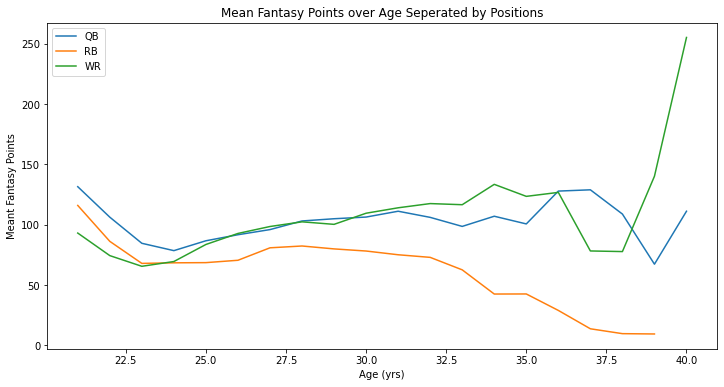

In [8]:
fig1, ax1 = plt.subplots(figsize =(12,6))
ax1.plot(x, QB_means, label='QB')
ax1.plot(x, RB_means, label='RB')
ax1.plot(x, WR_means, label ='WR')
plt.title('Mean Fantasy Points over Age Seperated by Positions')
plt.xlabel('Age (yrs)')
plt.ylabel('Meant Fantasy Points')
plt.legend()

print(np.var(RB_means))